# Marketing Outcome Prediction: Portuguese Bank Call Campaign

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

- clean and prepare the data, 
- build a decision tree with default hyperparameters, 
- understand all the hyperparameters that we can tune, and finally
- choose the optimal hyperparameters using grid search cross-validation.

**Dataset**

The dataset contains 45212 records with following features about the contacted persons during the campaign:
- age: age of person contacted (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self- employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced'means divorced or widowed)
- education (categorical:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course', 'university.degree','unknown')
- default: has credit in default? (categorical: 'no', 'yes', 'unknown')

- balance: account balance of customer on the day of contact (numeric)
- housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

- loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

- contact: contact communication type (categorical: 'cellular', 'telephone')

- day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

- month: Month of last contact (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

- duration: last contact duration, in seconds (numeric)

- campaign: number of times a customer was contacted during the campaign (numeric, includes last contact)

- pdays: number of days passed after the customer was last contacted from a previous campaign (numeric; 999 means customer was not previously contacted)

- previous: number of times the customer was contacted prior to (or before) this campaign (numeric)

- poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

- y: has the customer subscribed a term deposit? (binary: 'yes', 'no')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
bank=pd.read_csv('bank/bank-full.csv', sep=';')

In [4]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
bank.shape

(45211, 17)

In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
bank.columns[bank.dtypes=='object']

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

## Data Preparation

In [8]:
from sklearn import preprocessing

# encode categorical variables using Label Encoder

# select all categorical variables
bank_categorical = bank.select_dtypes(include=['object'])
bank_categorical.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [9]:
# apply Label encoder to df_categorical

le=preprocessing.LabelEncoder()
bank_categorical=bank_categorical.apply(le.fit_transform)
bank_categorical.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,4,1,2,0,1,0,2,8,3,0
1,9,2,1,0,1,0,2,8,3,0
2,2,1,1,0,1,1,2,8,3,0
3,1,1,3,0,1,0,2,8,3,0
4,11,2,3,0,0,0,2,8,3,0


In [10]:
# concat df_categorical with original df
bank = bank.drop(bank_categorical.columns, axis=1)
bank = pd.concat([bank, bank_categorical], axis=1)
bank.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0


In [11]:
# look at column types
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
balance      45211 non-null int64
day          45211 non-null int64
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
job          45211 non-null int64
marital      45211 non-null int64
education    45211 non-null int64
default      45211 non-null int64
housing      45211 non-null int64
loan         45211 non-null int64
contact      45211 non-null int64
month        45211 non-null int64
poutcome     45211 non-null int64
y            45211 non-null int64
dtypes: int64(17)
memory usage: 5.9 MB


In [12]:
# convert target variable income to categorical
bank['y']=bank['y'].astype('category')

## Model Building and Evaluation

#### Splitting into test and train datasets

In [15]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [16]:
# Putting feature variable to X
X = bank.drop('y',axis=1)

# Putting response variable to y
y = bank['y']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

#### Building the model with default parameters

In [14]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc=RandomForestClassifier()

In [38]:
#fitting the model
rfc.fit(X_train,y_train)

/Users/taniasaha/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
# Making predictions using the default model
y_pred=rfc.predict(X_test)

In [40]:
# Importing Model Evaluation metrics from sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [41]:
# Classification report of the default model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11967
           1       0.65      0.38      0.48      1597

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.79      0.68      0.71     13564
weighted avg       0.89      0.90      0.89     13564



In [42]:
#Checking accuracy score and confusion matrix

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[11646   321]
 [  994   603]]
0.9030521969920378


In [44]:
print('The default model has an accuracy score of', accuracy_score(y_test, y_pred))

The default model has an accuracy score of 0.9030521969920378


## Hyperparameter Tuning

### Tuning Max Depth

In [13]:
#GridSearchCV to find optimal depth
from sklearn.model_selection import KFold, GridSearchCV

In [57]:
#Specifying number of folds for k-folds CV
n_folds= 10

#parameters to build the model on
parameters={'max_depth':range(2,20,2)}

#instantiate the model
rf=RandomForestClassifier()

rf= GridSearchCV(rf, parameters, cv=n_folds, scoring='accuracy')

rf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20, 2)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [58]:
scores=rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.056726,0.008591,0.003048,0.000315,2,{'max_depth': 2},0.883133,0.883133,0.883412,0.883412,...,0.883330,0.883330,0.883330,0.883334,0.883334,0.883334,0.883334,0.883334,0.883338,0.000012
1,0.081560,0.006739,0.003372,0.000254,4,{'max_depth': 4},0.889135,0.891346,0.892891,0.889731,...,0.895373,0.888245,0.889439,0.886318,0.891690,0.890040,0.887723,0.894428,0.890434,0.002741
2,0.103035,0.003340,0.003484,0.000081,6,{'max_depth': 6},0.895136,0.897347,0.896367,0.895419,...,0.902114,0.899375,0.898638,0.902573,0.900818,0.902047,0.902538,0.905277,0.900907,0.002334
3,0.128306,0.003128,0.003901,0.000080,8,{'max_depth': 8},0.901769,0.895136,0.896367,0.902370,...,0.915385,0.917141,0.912155,0.915423,0.912931,0.917389,0.914861,0.912579,0.914533,0.001767
4,0.156433,0.002852,0.004464,0.000081,10,{'max_depth': 10},0.902716,0.899874,0.896682,0.898894,...,0.929289,0.925918,0.932133,0.929712,0.929291,0.928449,0.930028,0.925570,0.928991,0.001947


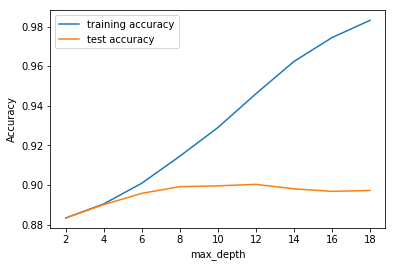

In [59]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning n_estimators

In [64]:
#parameters to build the model on
parameters= {'n_estimators':range(100, 1500, 400)}

#Instantiating the model
rf=RandomForestClassifier()

rf=GridSearchCV(rf, parameters, cv=n_folds, scoring='accuracy')

rf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [62]:
scores=rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,2.295987,0.069012,0.049953,0.004828,100,{'n_estimators': 100},0.903348,0.898294,0.898894,0.907741,...,1.0,1.0,1.0,1.0,1.0,0.999965,1.0,1.0,0.999996,0.000011
1,11.374873,0.198935,0.242288,0.014019,500,{'n_estimators': 500},0.907138,0.899558,0.899210,0.906161,...,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.000000,0.000000
2,20.544976,0.294328,0.444503,0.015202,900,{'n_estimators': 900},0.908086,0.899558,0.896682,0.905845,...,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.000000,0.000000
3,29.659946,0.533129,0.626461,0.024511,1300,{'n_estimators': 1300},0.908086,0.899558,0.898894,0.905213,...,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.000000,0.000000
4,38.522844,1.719159,0.837105,0.066591,1700,{'n_estimators': 1700},0.904296,0.898610,0.896998,0.905845,...,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.000000,0.000000


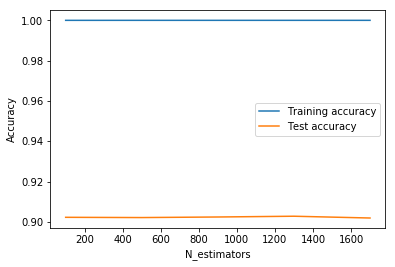

In [63]:
#Plotting accuracies with n_estimators
plt.plot(scores['param_n_estimators'],
        scores['mean_train_score'],
        label='Training accuracy')
plt.plot(scores['param_n_estimators'],
        scores['mean_test_score'],
        label='Test accuracy')
plt.xlabel('N_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Tuning max_features

In [67]:
#Specifying the number of folds for k-fold CV
n_folds=5

#parameters to build the model on
parameters={'max_features':range(2,17,2)}

#Instantiating the model
rf=RandomForestClassifier()

rf=GridSearchCV(rf, parameters, cv=n_folds, scoring='accuracy')

rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': range(2, 17, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [68]:
scores=rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.143545,0.014326,0.010580,0.000126,2,{'max_features': 2},0.892733,0.893523,0.897298,0.893664,...,0.894650,0.001723,8,0.990639,0.991192,0.991508,0.990758,0.991192,0.991058,0.000318
1,0.204319,0.005156,0.009737,0.000186,4,{'max_features': 4},0.896840,0.895577,0.898562,0.897456,...,0.897494,0.001235,1,0.991587,0.991192,0.992100,0.992732,0.991232,0.991769,0.000582
2,0.264961,0.003170,0.009597,0.000225,6,{'max_features': 6},0.893839,0.898262,0.897298,0.896824,...,0.897210,0.001974,4,0.991705,0.991034,0.991508,0.991627,0.992219,0.991618,0.000380
3,0.414956,0.021370,0.012169,0.001649,8,{'max_features': 8},0.897472,0.893997,0.898720,0.896508,...,0.897494,0.002257,1,0.991034,0.991745,0.991745,0.991469,0.991903,0.991579,0.000306
4,0.499536,0.037929,0.010447,0.001214,10,{'max_features': 10},0.900316,0.893523,0.899194,0.893348,...,0.896925,0.002924,5,0.991942,0.991666,0.992693,0.991232,0.992179,0.991942,0.000490


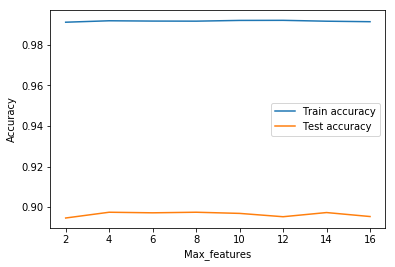

In [70]:
#Plotting accuracies with max_features
plt.plot(scores['param_max_features'],
        scores['mean_train_score'],
        label='Train accuracy')
plt.plot(scores['param_max_features'],
        scores['mean_test_score'],
        label='Test accuracy')
plt.xlabel('Max_features')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Tuning min_samples_leaf

In [74]:
#Specifying the number of k_folds for grid search cross-validation
n_folds=5

#parameters to build the model on
parameters={'min_samples_leaf':range(50,500,50)}

#Instantiating the model
rf=RandomForestClassifier()

rf=GridSearchCV(rf,parameters, cv=n_folds, scoring='accuracy')

rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(50, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [75]:
scores=rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.153770,0.022760,0.010367,0.005749,50,{'min_samples_leaf': 50},0.896367,0.898104,0.902038,0.898246,...,0.898411,0.001934,1,0.902753,0.901924,0.902717,0.902599,0.903073,0.902613,0.000379
1,0.135370,0.005067,0.007255,0.000232,100,{'min_samples_leaf': 100},0.899526,0.896840,0.896666,0.893664,...,0.896546,0.001873,2,0.899514,0.899277,0.896279,0.896121,0.898728,0.897984,0.001479
2,0.125491,0.005904,0.006832,0.000356,150,{'min_samples_leaf': 150},0.893997,0.892891,0.893980,0.894770,...,0.893639,0.000806,3,0.894300,0.892207,0.893830,0.896161,0.893830,0.894066,0.001266
3,0.114781,0.004575,0.006600,0.000442,200,{'min_samples_leaf': 200},0.893207,0.894629,0.894296,0.891768,...,0.893039,0.001326,4,0.893905,0.895920,0.893791,0.895213,0.892132,0.894192,0.001305
4,0.106375,0.003932,0.006193,0.000120,250,{'min_samples_leaf': 250},0.890205,0.886730,0.885922,0.885606,...,0.887098,0.001637,5,0.889718,0.885729,0.886128,0.886010,0.889170,0.887351,0.001723


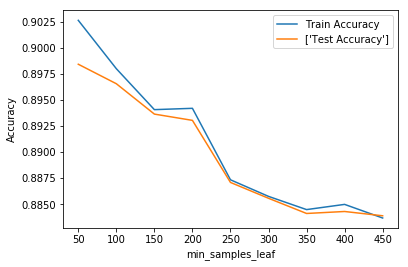

In [76]:
#Plotting the GridSrearch results
plt.plot(scores['param_min_samples_leaf'],
        scores['mean_train_score'],
        label='Train Accuracy')
plt.plot(scores['param_min_samples_leaf'],
        scores['mean_test_score'],
        label=['Test Accuracy'])
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Tuning min_samples_split

In [77]:
#k_folds
n_folds=5

#Specifying parameters used to build the model on
parameters={'min_samples_split':range(50,600,50)}

# Instantiating the model
rf=RandomForestClassifier()

rf=GridSearchCV(rf,parameters, cv=n_folds, scoring='accuracy')

rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(50, 600, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [79]:
scores=rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.192416,0.021211,0.009437,0.000621,50,{'min_samples_split': 50},0.904107,0.898420,0.903144,0.901722,...,0.901634,0.001974,1,0.923016,0.922463,0.922743,0.923454,0.924836,0.923302,0.000834
1,0.174851,0.007665,0.008910,0.000567,100,{'min_samples_split': 100},0.897946,0.899842,0.902512,0.898562,...,0.899738,0.001569,2,0.911917,0.912114,0.912789,0.914369,0.912157,0.912669,0.000899
2,0.157754,0.006466,0.007684,0.000150,150,{'min_samples_split': 150},0.899684,0.899052,0.900616,0.898246,...,0.899232,0.000845,3,0.908915,0.909981,0.908326,0.907773,0.906667,0.908333,0.001109
3,0.155732,0.008003,0.007376,0.000117,200,{'min_samples_split': 200},0.898736,0.898262,0.900616,0.898878,...,0.899011,0.000828,5,0.903543,0.903504,0.904416,0.905759,0.902164,0.903877,0.001184
4,0.148524,0.004512,0.007325,0.000244,250,{'min_samples_split': 250},0.898104,0.894945,0.899194,0.898088,...,0.897147,0.001667,6,0.902674,0.901529,0.899360,0.902875,0.903270,0.901942,0.001415


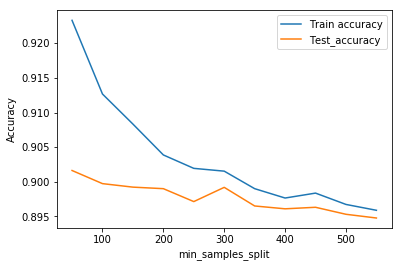

In [80]:
#Visualising Grid Search results
plt.plot(scores['param_min_samples_split'],
        scores['mean_train_score'],
        label='Train accuracy')
plt.plot(scores['param_min_samples_split'],
        scores['mean_test_score'],
        label='Test_accuracy')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Grid Search to Find Optimal Hyperparameters

In [17]:
n_folds=5

parameters={'max_depth':[8,10,12],
           'n_estimators':[1200],
           'min_samples_split':[100,200,300],
           'min_samples_leaf':range(50,150,50),
           'max_features':[4,6,8]}

rf=RandomForestClassifier()

grid_search=GridSearchCV(estimator=rf, param_grid=parameters, cv=n_folds, scoring='accuracy',
                        n_jobs = -1,verbose = 1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 21.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [8, 10, 12], 'n_estimators': [1200], 'min_samples_split': [100, 200, 300], 'min_samples_leaf': range(50, 150, 50), 'max_features': [4, 6, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [18]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9009068790090687 using {'max_depth': 12, 'max_features': 6, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 1200}


### Fitting the final model with the best parameters obtained from grid search.

In [19]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=12,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=6,
                             n_estimators=1200)

In [20]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
# predict
predictions = rfc.predict(X_test)

In [22]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11967
           1       0.70      0.35      0.47      1597

   micro avg       0.91      0.91      0.91     13564
   macro avg       0.81      0.67      0.71     13564
weighted avg       0.89      0.91      0.89     13564



In [24]:
print(confusion_matrix(y_test,predictions))

[[11727   240]
 [ 1032   565]]


In [25]:
print(accuracy_score(y_test, predictions))

0.9062223532881156
